In [ ]:
pip install Sastrawi

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import Sastrawi
# from wordcloud import WordCloud
import numpy as np
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
from google.colab import files
files.upload()

Saving sentiment (1).csv to sentiment (1) (1).csv


{'sentiment (1) (1).csv': b"content,score,aspek,sentimen\nsangat bagus untuk membantu bapak ibu guru dalam melihat datanya dengan cepat,5,Informasi,Positif\nsangat membantu app ini karena kami membutuhkan informasi trimakasih simpatika,5,Informasi,Positif\naplikasi paling top keren banget lengkap yang membuat aplikasi pintar banget sudah diberi kecerdasan ilmu dan mau berbagi terima kasih semoga sukses selalu,5,Umum,Positif\nalhamdulillah sangat membantu,5,Umum,Positif\nsaya berikan bintang karena semua ikhtiar demi kebaikan walaupun masih perlu pengembangan saya berikan apresiasi yang setinggi-tingginya terima kasih app ini sangat bermanfaat bagi kami para guru di seluruh nusantara,5,Umum,Positif\nboleh saya kasih full bintang tapi ada syaratnya hehe tolong permudah saya ketika saya lupa password karena sudah berbagai cara apapun saya ikuti instruksi untuk reset password namun belum berhasil juga hingga sekarang,5,Autentikasi,Negatif\naplikasi simpel dan mudah dipahami mudah-mudahan d

In [113]:
data = pd.read_csv("sentiment (1).csv")
data

,content,score,aspek,sentimen
0,sangat bagus untuk membantu bapak ibu guru dal...,5,Informasi,Positif
1,sangat membantu app ini karena kami membutuhka...,5,Informasi,Positif
2,aplikasi paling top keren banget lengkap yang ...,5,Umum,Positif
3,alhamdulillah sangat membantu,5,Umum,Positif
4,saya berikan bintang karena semua ikhtiar demi...,5,Umum,Positif
...,...,...,...,...
1636,bagus,1,Umum,Netral
1637,ok,1,Umum,Netral
1638,sukses,1,Umum,Netral
1639,sip,1,Umum,Netral


In [114]:
data.isnull().sum()

,0
content,0
score,0
aspek,0
sentimen,0


## Labeling

In [115]:
data_unclean = data.copy()

In [ ]:
label = []
for index, row in data_unclean.iterrows():
    if row["score"] <= 2:
        label.append(0)  # Negatif
    elif row["score"] == 3:
        label.append(1)  # Netral
    else:
        label.append(2)  # Positif

data_unclean["label"] = label

In [ ]:
data_unclean['label'].value_counts()

,count
label,
2,1337
0,170
1,148


## Drop Duplicate

In [ ]:
data_unclean = data.copy()

In [ ]:
data_unclean = data_unclean.drop_duplicates()
data_unclean

,content,score,at,label
0,sangat bagus untuk membantu bapak ibu guru dal...,5,2024-11-09 10:26:43,2
1,sangat membantu app ini karena kami membutuhka...,5,2024-11-21 19:08:36,2
2,aplikasi paling top kereen banget lengkap yang...,5,2020-10-23 00:21:23,2
3,alhamdulillaah sangat membantu,5,2025-01-06 16:55:20,2
4,saya berikan bintang karena semua ikhtiar dem...,5,2020-09-29 22:34:58,2
...,...,...,...,...
1650,bagus,1,2015-03-10 08:14:12,0
1651,ok,1,2016-11-25 14:13:54,0
1652,sukses,1,2015-10-16 19:49:26,0
1653,siippp,1,2019-08-31 01:12:01,0


## Drop Null

In [ ]:
data_unclean['content'].isnull().sum()
data_unclean = data_unclean.dropna(subset=['content'])
data_unclean

,content,score,at,label
0,sangat bagus untuk membantu bapak ibu guru dal...,5,2024-11-09 10:26:43,2
1,sangat membantu app ini karena kami membutuhka...,5,2024-11-21 19:08:36,2
2,aplikasi paling top kereen banget lengkap yang...,5,2020-10-23 00:21:23,2
3,alhamdulillaah sangat membantu,5,2025-01-06 16:55:20,2
4,saya berikan bintang karena semua ikhtiar dem...,5,2020-09-29 22:34:58,2
...,...,...,...,...
1650,bagus,1,2015-03-10 08:14:12,0
1651,ok,1,2016-11-25 14:13:54,0
1652,sukses,1,2015-10-16 19:49:26,0
1653,siippp,1,2019-08-31 01:12:01,0


In [ ]:
def contains_number(text):
    return bool(re.search(r'\d', str(text)))

data_unclean['clean_text'] = data_unclean['content'].apply(contains_number)

<ipython-input-33-77cb84de9133>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['content'].apply(contains_number)


In [ ]:
data_unclean.isnull().sum()

,0
content,0
score,0
aspek,0
sentimen,0


## Normalize

In [ ]:
# Normalisasi
norm = {
    " yg " : " yang ",
    " bgt " : " banget ",
    " bgt" : " banget",
    " bangat " : " banget ",
    " pisan " : " banget ",
    " trimakasih " : " terima kasih ",
    "terimakasih" : " terima kasih",
    " terimakasih" : " terima kasih",
    " terimakasih " : " terima kasih ",
    " kereen " : " keren ",
    "alhamdulillaah " : " Alhamdulillah ",
    " setinggitingginya " : " tinggi ",
    " app " : " aplikasi ",
    " apk " : " aplikasi ",
    " apl " : " aplikasi ",
    " nusantara" : " Indonesia",
    " he " : " ",
    " full " : " penuh ",
    "mudahmudahan " : " semoga ",
    " dgn " : " dengan ",
    "dg " : "dengan ",
    " tertakit " : " terkait ",
    " pengapdian " : " pengabdian ",
    "mantab " : "mantap ",
    " mantab " : " mantap ",
    " mantab" : " mantap",
    " mantaaf" : " mantap",
    " mantaaaaap" : " mantap ",
    "mantul" : "mantap",
    "mantaaab" : "mantap",
    "mantap jiwa" : "mantap",
    " ppg" : " ppg ",
    " tdk " : " tidak ",
    " sy " : " saya ",
    "tolong " : " tolong ",
    " berbeling belit " : " berbelit ",
    " guruguru " : " guru ",
    " ijasah " : " ijazah ",
    " terhusus " : " terkhusus ",
    " dn " : " dan ",
    "sngat " : "sangat ",
    " fahammmm" : " paham",
    " oke" : " baik",
    " blm " : " belum ",
    " lg" : " lagi",
    " sip " : " bagus ",
    " asyik " : " seru ",
    " fun " : " seru ",
    " best " : " terbaik ",
    "good" : "bagus",
    "bagussss" : "bagus",
    "bagussss " : "bagus ",
    " bagussss" : " bagus",
    " bagussss " : " bagus ",
    "jos" : "bagus",
    "like" : "suka",
    "informatig" : "informatif",
    "siiiiip" : "bagus",
    "good job" : "bagus",
    "nice" : "bagus",
    "jozz" : "bagus",
    "msh " : "masih ",
    "easy " : "mudah ",
    " parmudahkan " : " mudahkan ",
    " jg " : " juga ",
    " km " : " kami ",
    "smg " : "semoga ",
    " kl " : " kalau ",
    " lg " : " lagi ",
    " jd " : " jadi ",
    " dpt " : " dapat ",
    "sngt " : "sangat ",
    " sngt " : " sangat ",
    " se x" : " sekali",
    " mmbntu " : " membantu ",
    " memudhkn " : " memudahkan ",
    "praktis" : " praktis",
    " yg": " yang",
    " ok": " baik",
    " oke": " baik",
    " banget": " sangat",
    " aplikasinya": " aplikasi",
    " sip": " baik",
    " tdk": " tidak",
    " gak": " tidak",
    " bgt": " sangat",
    " trs": " terus",
    " dr": " dari",
    " krn": " karena",
    " sdh": " sudah",
    " blm": " belum",
    " tp": " tapi",
    " sy": " saya",
    " sbg": " sebagai",
    " utk": " untuk",
    " dlm": " dalam",
    " sj": " saja",
    " sm": " sama",
    " pd": " pada",
    " jd": " jadi",
    " mnrt": " menurut",
    " trmksh": " terima kasih",
    " mksh": " terima kasih",
    " kereen": " keren",
    "huebat": " hebat",
    "siippp": "sip",
    " trimakasih": " terima kasih",
    " aplkasi ": " aplikasi ", " apalikasi ": " aplikasi ", " apliasi ": " aplikasi ",
    " baguss ": " bagus ", " baguuss ": " bagus ", " bgs ": " bagus ",
    " mantabb ": " mantap ", " mantul ": " mantap ", " mantep ": " mantap ",
    " sgtt ": " sangat ", " sngt ": " sangat ", " sangaat ": " sangat ",

    " tdk ": " tidak ", " gpp ": " tidak apa-apa ", " trs ": " terus ",
    " blm ": " belum ", " udh ": " sudah ", " bgt ": " banget ", " bgt": " banget",
    " gak ": " tidak ", " ga ": " tidak ", " gabisa ": " tidak bisa ", " gaboleh ": " tidak boleh ",

    " log ": " login ", " server down ": " server tidak tersedia ",
    " nyesel ": " menyesal ",

    " best ": " terbaik ", " vibes ": " suasana ", " stylish ": " bergaya ",
    " worth ": " layak ", " simple ": " mudah ", " early ": " awal ",

    " kudu ": " harus ", " hrs ": " harus ", " jk ": " jika ", " dg ": " dengan ",
    " jd ": " jadi ", " problem ": " masalah ", " iru ": " itu ",
    " kereen": " keren",
    "huebat": " hebat",
    "siippp": "sip",
    " mendanlut": " mendownload",
    " logen": " login",
    " lht": " lihat",
    " yng": " yang",
    " laah": " lah",
    " tidakmpang": " gampang",
    "siip": "sip",
    " donlod": " download",
    " bs ": " bisa ",
    "gak ": " tidak ",
    "gkmana ": " bagaimana ",
    " betmanfaat ": " bermanfaat ",
    " dlm ": " dalam ",
    " aplikasix ": " aplikasinya ",
    " hax ": " hanya ",
    " gk ": " tidak ",
    " log in": " login ",
    " sllu ": " selalu ",
    " ggal ": " gagal ",
    " daribrowser ": " dari browser ",
    "error": "error ",
    "entah ": "tidak tau ",
    " lelet ": " lambat ",
    " dn ": " dan ",
    "kaga ": "tidak ",
    "eror ": "error ",
    " erorre ": " error ",
    " nggak ": " tidak ",
    " donlot ": " download ",
    " males ": " malas ",
    " tdk ": " tidak ",
    " gak ": " tidak ",
    " pasword": " password ",
    " dk ": " tidak ",
    " lgsung ": " langsung ",
    "knpa ": " kenapa ",
    " bisaaa ": " bisa ",
    "updet": "update",
    "login": "login ",
    "trims ": "terima ",
    " blm ": " belum ",
    " sklh ": " sekolah ",
    " tidk ": " tidak ",
    "singkron": "sinkron",
    "thankss": "terima kasih",
    "ngak": "tidak",
    "danlut": "download",
    "thanks": " terima kasih",
    " kpn ": " kapan ",
    "trimksh": "terima kasih",
    "ptkterimakasih": "ptk terima kasih",
    "mantaaap": "mantap",
    "baguuss": "bagus",
    "trima ksh": "terima kasih",
    "thanks": "terima kasih",
    "sipppppp": "sip",
    "mantaaaap": "mantap",
    "siiiippppp": "sip",
    "hebet": "hebat",
    "sipzzzz": "sip",
    "mantappp": "mantap",
    "mantaaap": "mantap",
    "kereeeeen": "keren",
    "mantaaabbbb": "mantab",
    "siiiip": "sip",
    "siiipppp": "sip",
    "bagusssss": "bagus",

}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

data_unclean['content'] = data_unclean['content'].apply(lambda x: normalisasi(x))
data_unclean

<ipython-input-12-c15619fc1dca>:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unclean['content'] = data_unclean['content'].apply(lambda x: normalisasi(x))


,content,score,at,label
0,sangat bagus untuk membantu bapak ibu guru dal...,5,2024-11-09 10:26:43,2
1,sangat membantu aplikasi ini karena kami membu...,5,2024-11-21 19:08:36,2
2,aplikasi paling top keren sangat lengkap yang ...,5,2020-10-23 00:21:23,2
3,Alhamdulillah sangat membantu,5,2025-01-06 16:55:20,2
4,saya berikan bintang karena semua ikhtiar dem...,5,2020-09-29 22:34:58,2
...,...,...,...,...
1650,bagus,1,2015-03-10 08:14:12,0
1651,ok,1,2016-11-25 14:13:54,0
1652,sukses,1,2015-10-16 19:49:26,0
1653,sip,1,2019-08-31 01:12:01,0


In [ ]:
data_unclean.to_csv('dataWithLabel.csv', index=False)

In [ ]:
data_unclean['label'].sum()

2805

## Stopwords

In [116]:
data_clean = data_unclean.copy()

In [117]:
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()

if "ok" in stop_words:
    stop_words.remove("ok")

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text


data_clean['content'] = data_clean['content'].apply(lambda x: stopword(x))
data_clean.head()

,content,score,aspek,sentimen
0,sangat bagus membantu bapak ibu guru melihat d...,5,Informasi,Positif
1,sangat membantu app karena membutuhkan informa...,5,Informasi,Positif
2,aplikasi paling top keren banget lengkap membu...,5,Umum,Positif
3,alhamdulillah sangat membantu,5,Umum,Positif
4,berikan bintang semua ikhtiar kebaikan walaupu...,5,Umum,Positif


## Tokenize

In [118]:
tokenized = data_clean['content'].apply(lambda x:x.split())
tokenized

,content
0,"[sangat, bagus, membantu, bapak, ibu, guru, me..."
1,"[sangat, membantu, app, karena, membutuhkan, i..."
2,"[aplikasi, paling, top, keren, banget, lengkap..."
3,"[alhamdulillah, sangat, membantu]"
4,"[berikan, bintang, semua, ikhtiar, kebaikan, w..."
...,...
1636,[bagus]
1637,[ok]
1638,[sukses]
1639,[sip]


## Stemming

In [119]:
# def stemming(text_cleaning):
#   factory = StemmerFactory()
#   stemmer = factory.create_stemmer()
#   do = []
#   for w in text_cleaning:
#     dt = stemmer.stem(w)
#     do.append(dt)
#   d_clean = []
#   d_clean = " ".join(do)
#   print(d_clean)
#   return d_clean

# tokenized = tokenized.apply(stemming)


def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    if w.lower() == "semoga":
      dt = w
    else:
      dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     do = []
#     for w in text_cleaning:
#         if " " in w:  # Cek apakah ada spasi dalam string (lebih dari satu kata)
#             dt = stemmer.stem(w)
#         else:
#             dt = w  # Jika hanya satu kata, tidak dilakukan stemming
#         do.append(dt)
#     d_clean = " ".join(do)
#     print(d_clean)
#     return d_clean
# tokenized = tokenized.apply(stemming)

sangat bagus bantu bapak ibu guru lihat data cepat
sangat bantu app karena butuh informasi trimakasih simpatika
aplikasi paling top keren banget lengkap buat aplikasi pintar banget beri cerdas ilmu mau bagi terima kasih semoga sukses selalu
alhamdulillah sangat bantu
ikan bintang semua ikhtiar baik walaupun perlu kembang ikan apresiasi setinggi-tingginya terima kasih app sangat manfaat kami guru seluruh nusantara
kasih full bintang ada syarat hehe mudah ketika lupa password sudah bagai cara apa saya ikut instruksi reset password belum hasil hingga sekarang
aplikasi simpel mudah paham mudah masa depan aplikasi simpatika beri banyak solusi kbm lingkung kemenag
mudah kerja utama apabila salah isi data mudah baik
layan sangat bagus bantu siap dokumen
terima kasih ada app bisa bantu cepat pantau data dan dapat informasi kemenag
siap simpatika layan komunikasi sangat manfaat guru kait informasi kemenag mudah guru bawah naung kemenag selalu dapat informasi aktual dapat dipertanggungjawabkan s

In [ ]:
tokenized.to_csv('preprocessed_data.csv', index=False)
preprocessed_data = pd.read_csv('preprocessed_data.csv')
preprocessed_data.head()

,content
0,sangat bagus bantu bapak ibu guru lihat data c...
1,sangat bantu app karena butuh informasi trimak...
2,aplikasi paling top keren banget lengkap buat ...
3,alhamdulillah sangat bantu
4,ikan bintang semua ikhtiar baik walaupun perlu...


In [ ]:
preprocessed_data.

,content
0,"['sangat', 'bagus', 'membantu', 'bapak', 'ibu'..."
1,"['sangat', 'membantu', 'app', 'karena', 'membu..."
2,"['aplikasi', 'paling', 'top', 'keren', 'banget..."
3,"['alhamdulillah', 'sangat', 'membantu']"
4,"['berikan', 'bintang', 'semua', 'ikhtiar', 'ke..."
...,...
1636,['bagus']
1637,[]
1638,['sukses']
1639,['sip']


In [ ]:
data_unclean

,content,score,aspek,sentimen
0,sangat bagus untuk membantu bapak ibu guru dal...,5,Informasi,Positif
1,sangat membantu app ini karena kami membutuhka...,5,Informasi,Positif
2,aplikasi paling top keren banget lengkap yang ...,5,Umum,Positif
3,alhamdulillah sangat membantu,5,Umum,Positif
4,saya berikan bintang karena semua ikhtiar demi...,5,Umum,Positif
...,...,...,...,...
1636,bagus,1,Umum,Netral
1637,ok,1,Umum,Netral
1638,sukses,1,Umum,Netral
1639,sip,1,Umum,Netral


### Tidak perlu dulu

In [ ]:
data_stemming = data_stemming.rename(columns={"content": "content_stemming"})

In [ ]:
at1 = data_unclean["content"]
at2 = data_stemming["content_stemming"]
att2 = data_unclean["label"]

result = pd.concat([at1, at2, att2], axis=1)

In [ ]:
result

,content,content_stemming,label
0,sangat bagus untuk membantu bapak ibu guru dal...,sangat bagus bantu bapak ibu guru lihat data c...,1.0
1,sangat membantu app ini karena kami membutuhka...,sangat bantu app karena butuh informasi terima...,1.0
2,aplikasi paling top keren sangat lengkap yang ...,aplikasi paling top keren sangat lengkap buat ...,1.0
3,alhamdulillaah sangat membantu,alhamdulillaah sangat bantu,1.0
4,saya berikan bintang karena semua ikhtiar dem...,ikan bintang semua ikhtiar baik walaupun perlu...,1.0
...,...,...,...
997,NaN,admin coba bantu d web nama daftar di aplikasi...,NaN
1050,NaN,jadi aplikasi bagai mudah para sukwan jadi leb...,NaN
1387,NaN,cari ptk fungsi,NaN
1539,NaN,gagal hubung server,NaN


In [ ]:
files.upload()

Saving normalize_stemmed_data.csv to normalize_stemmed_data.csv


{'normalize_stemmed_data.csv': b'stemmed_data,score,at\nsangat bagus untuk bantu bapak ibu guru dalam lihat data dengan cepat,5,2024-11-09 10:26:43\nbantu aplikasi butuh informasi terima kasih simpatika,5,2024-11-21 19:08:36\naplikasi top keren lengkap aplikasi pinter cerdas ilmu bagi terima kasih moga sukses,5,2020-10-23 00:21:23\nalhamdulillah bantu,5,2025-01-06 16:55:20\nbintang ikhtiar baik kembang apresiasi terima kasih aplikasi manfaat guru seluruh indonesia,5,2020-09-29 22:34:58\nkasih penuh bintang sayaarat nya he tolong mudah lupa password dah apa ikut instruksi reset password hasil,5,2020-02-19 11:15:21\naplikasi simpel mudah paham moga aplikasi simpatika solusi kbm lingkung kemenag,5,2020-06-13 09:21:51\nmudah salah isi data mudah baik,5,2020-01-31 16:15:11\nlayan sangat bagus dan bantu dalam siap dokumen,5,2023-03-02 12:22:32\nterima kasih aplikasi bantu cepat pantau data informasi kemenag,5,2021-06-07 03:12:39\nsimpatika layan komunikasi manfaat guru kait informasi kemenag

In [ ]:
data_pre = pd.read_csv("normalize_stemmed_data.csv")
data_pre

,stemmed_data,score,at
0,sangat bagus untuk bantu bapak ibu guru dalam ...,5,2024-11-09 10:26:43
1,bantu aplikasi butuh informasi terima kasih si...,5,2024-11-21 19:08:36
2,aplikasi top keren lengkap aplikasi pinter cer...,5,2020-10-23 00:21:23
3,alhamdulillah bantu,5,2025-01-06 16:55:20
4,bintang ikhtiar baik kembang apresiasi terima ...,5,2020-09-29 22:34:58
...,...,...,...
1639,bagus,1,2015-03-10 08:14:12
1640,baik,1,2016-11-25 14:13:54
1641,sukses,1,2015-10-16 19:49:26
1642,sip,1,2019-08-31 01:12:01


In [ ]:
clean_data = data_pre.dropna(subset=['stemmed_data'])
clean_data

,stemmed_data,score,at
0,sangat bagus untuk bantu bapak ibu guru dalam ...,5,2024-11-09 10:26:43
1,bantu aplikasi butuh informasi terima kasih si...,5,2024-11-21 19:08:36
2,aplikasi top keren lengkap aplikasi pinter cer...,5,2020-10-23 00:21:23
3,alhamdulillah bantu,5,2025-01-06 16:55:20
4,bintang ikhtiar baik kembang apresiasi terima ...,5,2020-09-29 22:34:58
...,...,...,...
1639,bagus,1,2015-03-10 08:14:12
1640,baik,1,2016-11-25 14:13:54
1641,sukses,1,2015-10-16 19:49:26
1642,sip,1,2019-08-31 01:12:01


In [ ]:
tokenized = clean_data['stemmed_data'].apply(lambda x:x.split())
tokenized

,stemmed_data
0,"[sangat, bagus, untuk, bantu, bapak, ibu, guru..."
1,"[bantu, aplikasi, butuh, informasi, terima, ka..."
2,"[aplikasi, top, keren, lengkap, aplikasi, pint..."
3,"[alhamdulillah, bantu]"
4,"[bintang, ikhtiar, baik, kembang, apresiasi, t..."
...,...
1639,[bagus]
1640,[baik]
1641,[sukses]
1642,[sip]


In [ ]:
tokenized.to_csv('databersih2.csv', index=False)
data_clean = pd.read_csv('databersih2.csv', encoding='latin1')
data_clean.head()

,stemmed_data
0,"['sangat', 'bagus', 'untuk', 'bantu', 'bapak',..."
1,"['bantu', 'aplikasi', 'butuh', 'informasi', 't..."
2,"['aplikasi', 'top', 'keren', 'lengkap', 'aplik..."
3,"['alhamdulillah', 'bantu']"
4,"['bintang', 'ikhtiar', 'baik', 'kembang', 'apr..."


## TF-ID (Melihat total kata)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [120]:
preprocessed_data.shape

(1641, 1)

In [ ]:
data_unclean['sentimen'].shape

(1641,)

In [121]:
at1 = preprocessed_data["content"].reset_index(drop=True)
at2 = data_clean["aspek"].reset_index(drop=True)
at3 = data_clean["sentimen"].reset_index(drop=True)
result = pd.concat([at1, at2, at3], axis=1)
print(result.shape)  # Harus (1644, 2)


(1641, 3)


In [ ]:
print(type(at1))  # Pastikan ini pd.Series
print(type(at2))  # Pastikan ini pd.Series

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [124]:
result.isnull().sum()

,0
content,0
aspek,0
sentimen,0


In [ ]:
result.shape

(1572, 3)

In [123]:
result = result.dropna(subset=['content'])

In [ ]:
result

,content,aspek,sentimen
0,sangat bagus bantu bapak ibu guru lihat data c...,Informasi,Positif
1,sangat bantu app karena butuh informasi trimak...,Informasi,Positif
2,aplikasi paling top keren banget lengkap buat ...,Umum,Positif
3,alhamdulillah sangat bantu,Umum,Positif
4,ikan bintang semua ikhtiar baik walaupun perlu...,Umum,Positif
...,...,...,...
1636,bagus,Umum,Netral
1637,ok,Umum,Netral
1638,sukses,Umum,Netral
1639,sip,Umum,Netral


In [ ]:
review = result['content']
cv = CountVectorizer()
term_fit = cv.fit(review)

In [ ]:
term_fit.vocabulary_

{'sangat': 888,
 'bagus': 70,
 'membantu': 603,
 'bapak': 80,
 'ibu': 350,
 'guru': 322,
 'melihat': 597,
 'datanya': 193,
 'cepat': 169,
 'app': 52,
 'karena': 424,
 'membutuhkan': 612,
 'informasi': 369,
 'trimakasih': 1071,
 'simpatika': 964,
 'aplikasi': 50,
 'paling': 763,
 'top': 1070,
 'keren': 479,
 'banget': 75,
 'lengkap': 537,
 'membuat': 610,
 'pintar': 831,
 'diberi': 210,
 'kecerdasan': 448,
 'ilmu': 361,
 'mau': 590,
 'berbagi': 101,
 'terima': 1039,
 'kasih': 427,
 'semoga': 936,
 'sukses': 995,
 'selalu': 925,
 'alhamdulillah': 30,
 'berikan': 113,
 'bintang': 143,
 'semua': 939,
 'ikhtiar': 354,
 'kebaikan': 441,
 'walaupun': 1111,
 'perlu': 822,
 'pengembangan': 796,
 'apresiasi': 54,
 'setinggi': 957,
 'tingginya': 1066,
 'bermanfaat': 123,
 'kami': 419,
 'seluruh': 931,
 'nusantara': 735,
 'full': 299,
 'ada': 4,
 'syaratnya': 1003,
 'hehe': 339,
 'permudah': 823,
 'ketika': 490,
 'lupa': 556,
 'password': 770,
 'sudah': 993,
 'berbagai': 100,
 'cara': 165,
 'apapu

In [ ]:
term_frequency_all = term_fit.transform(review)
print(term_frequency_all)

  (0, 70)	1
  (0, 80)	1
  (0, 169)	1
  (0, 193)	1
  (0, 322)	1
  (0, 350)	1
  (0, 597)	1
  (0, 603)	1
  (0, 888)	1
  (1, 52)	1
  (1, 369)	1
  (1, 424)	1
  (1, 603)	1
  (1, 612)	1
  (1, 888)	1
  (1, 964)	1
  (1, 1071)	1
  (2, 50)	2
  (2, 75)	2
  (2, 101)	1
  (2, 210)	1
  (2, 361)	1
  (2, 427)	1
  (2, 448)	1
  (2, 479)	1
  :	:
  (1561, 534)	1
  (1561, 583)	1
  (1561, 1000)	1
  (1562, 369)	1
  (1562, 597)	1
  (1562, 603)	1
  (1562, 853)	1
  (1563, 146)	1
  (1563, 470)	1
  (1563, 499)	1
  (1563, 547)	1
  (1563, 691)	1
  (1564, 73)	1
  (1564, 540)	1
  (1564, 853)	1
  (1565, 146)	1
  (1565, 547)	1
  (1566, 520)	1
  (1566, 546)	1
  (1567, 635)	1
  (1567, 1000)	1
  (1568, 70)	1
  (1569, 995)	1
  (1570, 970)	1
  (1571, 338)	1


In [ ]:
ulasan_tf = review[1]
print(ulasan_tf)

sangat membantu app karena membutuhkan informasi trimakasih simpatika


In [ ]:
term_frequency = term_fit.transform([ulasan_tf])
term_frequency

<1x1128 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
print(term_frequency)

  (0, 52)	1
  (0, 369)	1
  (0, 424)	1
  (0, 603)	1
  (0, 612)	1
  (0, 888)	1
  (0, 964)	1
  (0, 1071)	1


In [ ]:
dokumen = term_fit.transform(review)
tfidf_transformer = TfidfTransformer().fit(dokumen)
print(tfidf_transformer.idf_)

tfidf = tfidf_transformer.transform(term_frequency)
print(tfidf)

[7.26212761 7.66759272 7.66759272 ... 7.66759272 7.66759272 7.66759272]
  (0, 52)	0.4025173597731944
  (0, 369)	0.29445264089729195
  (0, 424)	0.42736242461085727
  (0, 603)	0.1711053389319573
  (0, 612)	0.44499027864753815
  (0, 888)	0.16425301928669597
  (0, 964)	0.30597562966038755
  (0, 1071)	0.4698353434852011


In [127]:
train_negatif = result[result["sentimen"] == "Negatif"]
train_negatif

,content,aspek,sentimen
5,kasih full bintang ada syarat hehe mudah ketik...,Autentikasi,Negatif
19,aplikasi bisa pakai semua,Fitur,Negatif
21,aku harap panggil ikut ppg pernah panggil kend...,Kepraktisan,Negatif
22,iklan selalu ganggu jangan iklan,Iklan,Negatif
29,segera atas lambat jadi,Performa,Negatif
...,...,...,...
1629,susah banget masuk facebook lelah deh,Autentikasi,Negatif
1631,kenapa kok bisa login min,Autentikasi,Negatif
1633,bisa login,Autentikasi,Negatif
1634,loadingnya lambat,Performa,Negatif


In [125]:
pip install wordcloud

In [126]:
from wordcloud import WordCloud

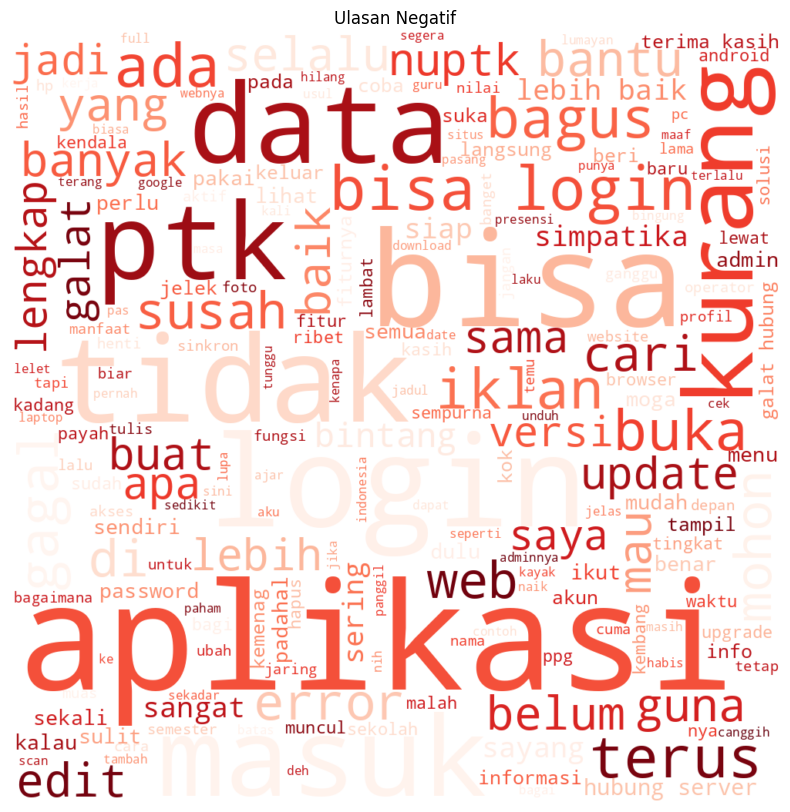

In [128]:
all_text_s0 = ' '.join(word for word in train_negatif["content"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ulasan Negatif")
plt.margins(x=0, y=0)
plt.show()

In [129]:
train_netral = result[result["sentimen"] == "Netral"]
train_netral

,content,aspek,sentimen
231,coba,Umum,Netral
267,bagaimana sekolah induk ubah,Informasi,Netral
279,coba,Umum,Netral
335,cara buat ptk,Informasi,Netral
386,penting jangan data online dapodik,Informasi,Netral
...,...,...,...
1636,bagus,Umum,Netral
1637,ok,Umum,Netral
1638,sukses,Umum,Netral
1639,sip,Umum,Netral


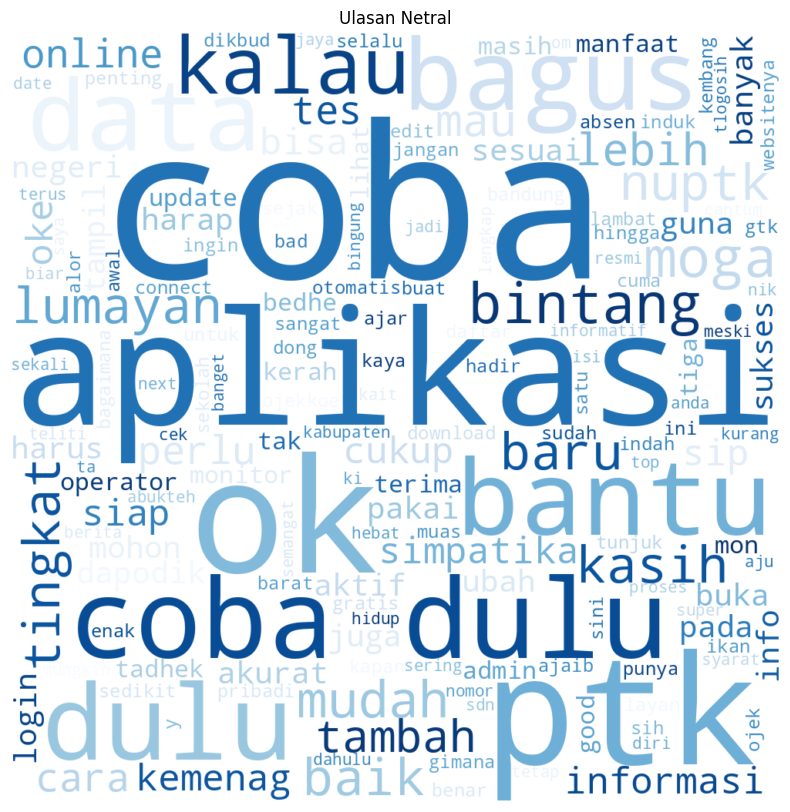

In [130]:
all_text_s0 = ' '.join(word for word in train_netral["content"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ulasan Netral")
plt.margins(x=0, y=0)
plt.show()

In [131]:
train_positif = result[result["sentimen"] == "Positif"]
train_positif

,content,aspek,sentimen
0,sangat bagus bantu bapak ibu guru lihat data c...,Informasi,Positif
1,sangat bantu app karena butuh informasi trimak...,Informasi,Positif
2,aplikasi paling top keren banget lengkap buat ...,Umum,Positif
3,alhamdulillah sangat bantu,Umum,Positif
4,ikan bintang semua ikhtiar baik walaupun perlu...,Umum,Positif
...,...,...,...
1518,lebih enak lihat ptk sendiri,Fitur,Positif
1590,ok banget,Umum,Positif
1597,bagus,Umum,Positif
1604,sangat manfaat dunia didik,Umum,Positif


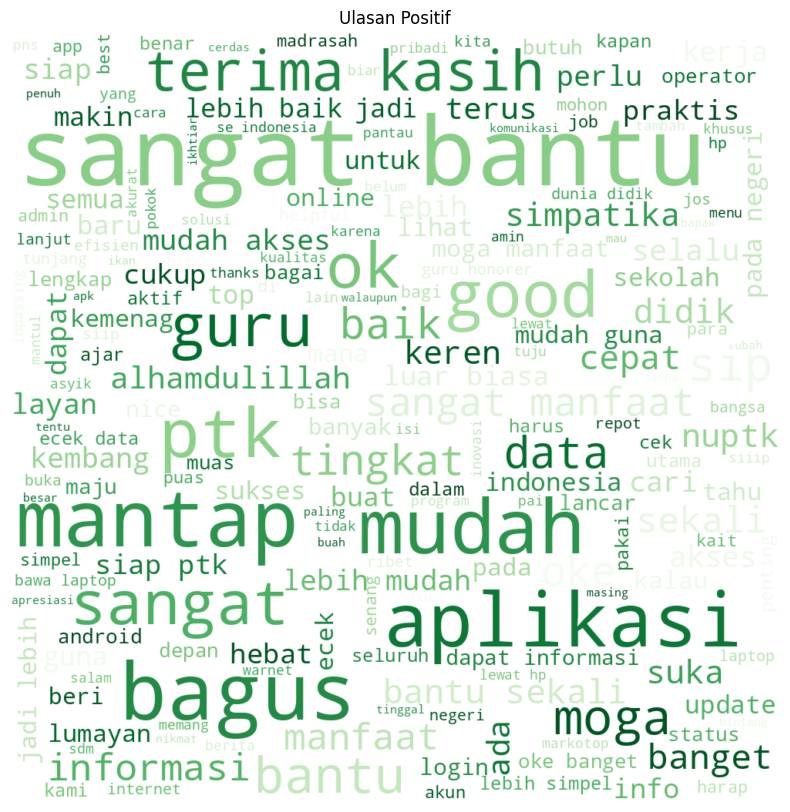

In [132]:
all_text_s0 = ' '.join(word for word in train_positif["content"])
wordcloud = WordCloud(colormap='Greens', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

<ipython-input-209-b747c9d21f02>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  aspek_data = pd.value_counts(result["aspek"], sort=True)


<function matplotlib.pyplot.show(close=None, block=None)>

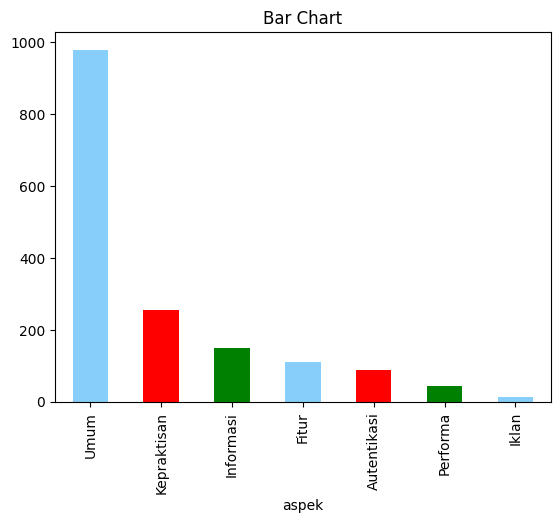

In [209]:
aspek_data = pd.value_counts(result["aspek"], sort=True)
aspek_data.plot(kind='bar', color=['lightskyblue', 'red', 'green'])
plt.title("Bar Chart")
plt.show

<ipython-input-134-1ea024fe52b2>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sentimen_data = pd.value_counts(result["sentimen"], sort=True)


<function matplotlib.pyplot.show(close=None, block=None)>

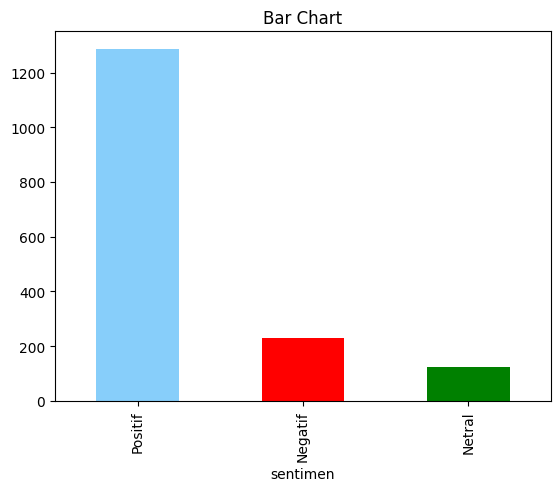

In [134]:
sentimen_data = pd.value_counts(result["sentimen"], sort=True)
sentimen_data.plot(kind='bar', color=['lightskyblue', 'red', 'green'])
plt.title("Bar Chart")
plt.show

## Oversampling

In [135]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(result[['content']], result['sentimen'])

In [210]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Cek distribusi awal
print("Distribusi awal:", Counter(result['aspek']))

# Undersampling kelas yang memiliki lebih dari 400 baris
undersampler = RandomUnderSampler(sampling_strategy={k: 600 for k, v in Counter(result['aspek']).items() if v > 600}, random_state=42)
X_under, y_under = undersampler.fit_resample(result[['content']], result['aspek'])

# Oversampling kelas yang memiliki kurang dari 400 baris
oversampler = RandomOverSampler(sampling_strategy={k: 600 for k, v in Counter(y_under).items() if v < 600}, random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_under, y_under)

# Cek distribusi akhir
print("Distribusi setelah resampling:", Counter(y_resampled))

Distribusi awal: Counter({'Umum': 979, 'Kepraktisan': 254, 'Informasi': 150, 'Fitur': 110, 'Autentikasi': 89, 'Performa': 45, 'Iklan': 12})
Distribusi setelah resampling: Counter({'Autentikasi': 600, 'Fitur': 600, 'Iklan': 600, 'Informasi': 600, 'Kepraktisan': 600, 'Performa': 600, 'Umum': 600})


In [ ]:
pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.3 MB/s eta 0:00:00


In [211]:
X_resampled = X_resampled['content']

<ipython-input-212-369337c55626>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='coolwarm')


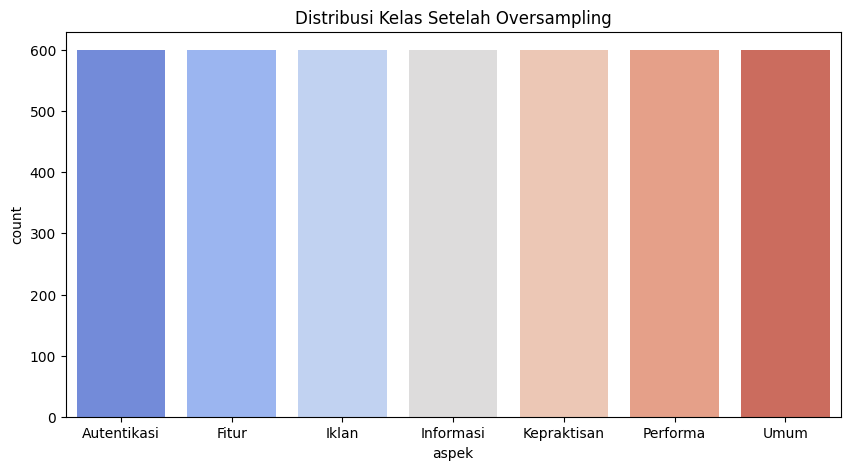

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(x=y_resampled, palette='coolwarm')
plt.title("Distribusi Kelas Setelah Oversampling")
plt.show()

In [138]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [139]:
y_encoded = label_encoder.fit_transform(y_resampled)

## Training

In [213]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.3, stratify=y_resampled, random_state=30)

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_encoded,
                                                    test_size=0.3, stratify=y_resampled, random_state=30)

In [214]:
X_train = X_resampled
y_train = y_resampled

In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [157]:
print(type(X_train))

<class 'pandas.core.series.Series'>


In [216]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(4200, 795)
(1260, 795)


In [167]:
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [217]:
print(y_train)

0       Autentikasi
1       Autentikasi
2       Autentikasi
3       Autentikasi
4       Autentikasi
           ...     
4195       Performa
4196       Performa
4197       Performa
4198       Performa
4199       Performa
Name: aspek, Length: 4200, dtype: object


In [218]:
X_train = X_train.toarray()

In [219]:
X_test = X_test.toarray()

In [ ]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Naive Bayes

In [220]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [221]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)

params_NB = {'var_smoothing': np.logspace(0, -9, num=100)}
gscv_nb = GridSearchCV(estimator=nb,
                        param_grid=params_NB,
                        cv = cv_method,
                        verbose = 1,
                        scoring = 'accuracy')

gscv_nb.fit(X_train, y_train)
gscv_nb.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 0.0657933224657568}

In [222]:
nb = GaussianNB(var_smoothing=  0.0657933224657568)

In [223]:
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.0657933224657568)

### Save model

In [224]:
import pickle

# Simpan model ke file
with open('nb_model_aspek.pkl', 'wb') as f:
    pickle.dump(nb, f)

## LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D, Bidirectional, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_length = X_train.shape[1]
X_train_padded = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test, maxlen=max_length, padding='post')

In [ ]:
# model = Sequential([
#     Embedding(input_dim=max_length, output_dim=128, input_length=max_length),
#     SpatialDropout1D(0.2),
#     Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
#     Dense(64, activation='relu'),
#     Dense(len(np.unique(y_train)), activation='softmax')
# ])

# model = Sequential([
#     Input(shape=(744,)),
#     Dense(128, activation='relu'),
#     Dropout(0.2),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(32, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

model = Sequential([
    LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2, input_shape=(1, X_train_padded.shape[1])),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(np.unique(y_train)), activation='softmax')  # Multi-class classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_8_1/Cast:0", shape=(None, 744), dtype=float32). Expected shape (None, 1, 744), but input has incompatible shape (None, 744)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 744), dtype=int32)
  • training=True
  • mask=None

In [ ]:
test_loss, test_acc = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 333ms/step - accuracy: 0.3065 - loss: 1.0990
Test Accuracy: 0.3333


## IndoBert

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p1", num_labels=len(y_resampled.unique()))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
class ReviewDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer(text, padding='max_length', truncation=True, max_length=self.max_length, return_tensors='pt')

        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=30)

In [ ]:
train_dataset = ReviewDataset(X_train.tolist(), y_train.tolist(), tokenizer)
test_dataset = ReviewDataset(X_test.tolist(), y_test.tolist(), tokenizer)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader)}")

Epoch 1, Loss: 0.5872133272886276


In [ ]:
# Evaluasi
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

In [ ]:
# Evaluasi hasil
from sklearn.metrics import classification_report
print(classification_report(all_labels, all_preds))

In [ ]:
model = BertForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p1", num_labels=len(set(y_resampled)))

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# Trainer API
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: rachadrisyh (rachadrisyh-brawijaya-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


KeyError: 1662

In [ ]:
import torch
from sklearn.metrics import accuracy_score, classification_report

def predict(texts, model, tokenizer, device):
    model.eval()  # Mode evaluasi
    encodings = tokenizer(
        texts,
        padding="max_length",
        truncation=True,
        max_length=512,
        return_tensors="pt"
    ).to(device)

    with torch.no_grad():
        outputs = model(**encodings)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)  # Kelas dengan skor tertinggi

    return predictions.cpu().numpy()

# Lakukan prediksi
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

y_pred = predict(X_test, model, tokenizer, device)

# Evaluasi hasil prediksi
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi: {acc:.4f}")

print(classification_report(y_test, y_pred))


## Predict

In [225]:
y_pred_nb = nb.predict(X_test)

In [226]:
y_pred_nb

array(['Umum', 'Autentikasi', 'Autentikasi', ..., 'Umum', 'Autentikasi',
       'Iklan'], dtype='<U11')

In [170]:
from sklearn.metrics import accuracy_score

In [228]:
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8810


# Percobaan

In [177]:
data_new = pd.read_csv("datates_simpatika.csv")
data_new

,content,score,aspek,sentimen
0,aplikasi ini sangat membantu dalam pekerjaan,5,Kepraktisan,Positif
1,fiturnya lengkap dan mudah digunakan,5,Fitur,Positif
2,sering error saat login,2,Autentikasi,Negatif
3,tampilannya menarik dan user-friendly,5,Performa,Positif
4,butuh akses internet yang stabil,3,Kepraktisan,Netral
...,...,...,...,...
96,aplikasi ini ringan dan cepat,5,Performa,Positif
97,banyak fitur yang tidak bisa digunakan,2,Fitur,Negatif
98,iklan terlalu berlebihan,2,Iklan,Negatif
99,butuh lebih banyak opsi integrasi,4,Fitur,Netral


## Preprocessing

 ### Drop Null

In [229]:
data_new['content'].isnull().sum()
data_new = data_new.dropna(subset=['content'])
data_new

,content,score,aspek,sentimen
0,aplikasi sangat membantu pekerjaan,5,Kepraktisan,Positif
1,fiturnya lengkap mudah digunakan,5,Fitur,Positif
2,sering error login,2,Autentikasi,Negatif
3,tampilannya menarik user-friendly,5,Performa,Positif
4,butuh akses internet stabil,3,Kepraktisan,Netral
...,...,...,...,...
96,aplikasi ringan cepat,5,Performa,Positif
97,banyak fitur tidak digunakan,2,Fitur,Negatif
98,iklan terlalu berlebihan,2,Iklan,Negatif
99,butuh lebih banyak opsi integrasi,4,Fitur,Netral


### Normalize

In [ ]:
# Normalisasi
norm = {
    " yg " : " yang ",
    " bgt " : " banget ",
    " bgt" : " banget",
    " bangat " : " banget ",
    " pisan " : " banget ",
    " trimakasih " : " terima kasih ",
    "terimakasih" : " terima kasih",
    " terimakasih" : " terima kasih",
    " terimakasih " : " terima kasih ",
    " kereen " : " keren ",
    "alhamdulillaah " : " Alhamdulillah ",
    " setinggitingginya " : " tinggi ",
    " app " : " aplikasi ",
    " apk " : " aplikasi ",
    " apl " : " aplikasi ",
    " nusantara" : " Indonesia",
    " he " : " ",
    " full " : " penuh ",
    "mudahmudahan " : " semoga ",
    " dgn " : " dengan ",
    "dg " : "dengan ",
    " tertakit " : " terkait ",
    " pengapdian " : " pengabdian ",
    "mantab " : "mantap ",
    " mantab " : " mantap ",
    " mantab" : " mantap",
    " mantaaf" : " mantap",
    " mantaaaaap" : " mantap ",
    "mantul" : "mantap",
    "mantaaab" : "mantap",
    "mantap jiwa" : "mantap",
    " ppg" : " ppg ",
    " tdk " : " tidak ",
    " sy " : " saya ",
    "tolong " : " tolong ",
    " berbeling belit " : " berbelit ",
    " guruguru " : " guru ",
    " ijasah " : " ijazah ",
    " terhusus " : " terkhusus ",
    " dn " : " dan ",
    "sngat " : "sangat ",
    " fahammmm" : " paham",
    " oke" : " baik",
    " blm " : " belum ",
    " lg" : " lagi",
    " sip " : " bagus ",
    " asyik " : " seru ",
    " fun " : " seru ",
    " best " : " terbaik ",
    "good" : "bagus",
    "bagussss" : "bagus",
    "bagussss " : "bagus ",
    " bagussss" : " bagus",
    " bagussss " : " bagus ",
    "jos" : "bagus",
    "like" : "suka",
    "informatig" : "informatif",
    "siiiiip" : "bagus",
    "good job" : "bagus",
    "nice" : "bagus",
    "jozz" : "bagus",
    "msh " : "masih ",
    "easy " : "mudah ",
    " parmudahkan " : " mudahkan ",
    " jg " : " juga ",
    " km " : " kami ",
    "smg " : "semoga ",
    " kl " : " kalau ",
    " lg " : " lagi ",
    " jd " : " jadi ",
    " dpt " : " dapat ",
    "sngt " : "sangat ",
    " sngt " : " sangat ",
    " se x" : " sekali",
    " mmbntu " : " membantu ",
    " memudhkn " : " memudahkan ",
    "praktis" : " praktis",
    " yg": " yang",
    " ok": " baik",
    " oke": " baik",
    " banget": " sangat",
    " aplikasinya": " aplikasi",
    " sip": " baik",
    " tdk": " tidak",
    " gak": " tidak",
    " bgt": " sangat",
    " trs": " terus",
    " dr": " dari",
    " krn": " karena",
    " sdh": " sudah",
    " blm": " belum",
    " tp": " tapi",
    " sy": " saya",
    " sbg": " sebagai",
    " utk": " untuk",
    " dlm": " dalam",
    " sj": " saja",
    " sm": " sama",
    " pd": " pada",
    " jd": " jadi",
    " mnrt": " menurut",
    " trmksh": " terima kasih",
    " mksh": " terima kasih",
    " kereen": " keren",
    "huebat": " hebat",
    "siippp": "sip",
    " trimakasih": " terima kasih",
    " aplkasi ": " aplikasi ", " apalikasi ": " aplikasi ", " apliasi ": " aplikasi ",
    " baguss ": " bagus ", " baguuss ": " bagus ", " bgs ": " bagus ",
    " mantabb ": " mantap ", " mantul ": " mantap ", " mantep ": " mantap ",
    " sgtt ": " sangat ", " sngt ": " sangat ", " sangaat ": " sangat ",

    " tdk ": " tidak ", " gpp ": " tidak apa-apa ", " trs ": " terus ",
    " blm ": " belum ", " udh ": " sudah ", " bgt ": " banget ", " bgt": " banget",
    " gak ": " tidak ", " ga ": " tidak ", " gabisa ": " tidak bisa ", " gaboleh ": " tidak boleh ",

    " log ": " login ", " server down ": " server tidak tersedia ",
    " nyesel ": " menyesal ",

    " best ": " terbaik ", " vibes ": " suasana ", " stylish ": " bergaya ",
    " worth ": " layak ", " simple ": " mudah ", " early ": " awal ",

    " kudu ": " harus ", " hrs ": " harus ", " jk ": " jika ", " dg ": " dengan ",
    " jd ": " jadi ", " problem ": " masalah ", " iru ": " itu ",
    " kereen": " keren",
    "huebat": " hebat",
    "siippp": "sip",
    " mendanlut": " mendownload",
    " logen": " login",
    " lht": " lihat",
    " yng": " yang",
    " laah": " lah",
    " tidakmpang": " gampang",
    "siip": "sip",
    " donlod": " download",
    " bs ": " bisa ",
    "gak ": " tidak ",
    "gkmana ": " bagaimana ",
    " betmanfaat ": " bermanfaat ",
    " dlm ": " dalam ",
    " aplikasix ": " aplikasinya ",
    " hax ": " hanya ",
    " gk ": " tidak ",
    " log in": " login ",
    " sllu ": " selalu ",
    " ggal ": " gagal ",
    " daribrowser ": " dari browser ",
    "error": "error ",
    "entah ": "tidak tau ",
    " lelet ": " lambat ",
    " dn ": " dan ",
    "kaga ": "tidak ",
    "eror ": "error ",
    " erorre ": " error ",
    " nggak ": " tidak ",
    " donlot ": " download ",
    " males ": " malas ",
    " tdk ": " tidak ",
    " gak ": " tidak ",
    " pasword": " password ",
    " dk ": " tidak ",
    " lgsung ": " langsung ",
    "knpa ": " kenapa ",
    " bisaaa ": " bisa ",
    "updet": "update",
    "login": "login ",
    "trims ": "terima ",
    " blm ": " belum ",
    " sklh ": " sekolah ",
    " tidk ": " tidak ",
    "singkron": "sinkron",
    "thankss": "terima kasih",
    "ngak": "tidak",
    "danlut": "download",
    "thanks": " terima kasih",
    " kpn ": " kapan ",
    "trimksh": "terima kasih",
    "ptkterimakasih": "ptk terima kasih",
    "mantaaap": "mantap",
    "baguuss": "bagus",
    "trima ksh": "terima kasih",
    "thanks": "terima kasih",
    "sipppppp": "sip",
    "mantaaaap": "mantap",
    "siiiippppp": "sip",
    "hebet": "hebat",
    "sipzzzz": "sip",
    "mantappp": "mantap",
    "mantaaap": "mantap",
    "kereeeeen": "keren",
    "mantaaabbbb": "mantab",
    "siiiip": "sip",
    "siiipppp": "sip",
    "bagusssss": "bagus",

}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

data_new['content'] = data_new['content'].apply(lambda x: normalisasi(x))
data_new

<ipython-input-12-c15619fc1dca>:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unclean['content'] = data_unclean['content'].apply(lambda x: normalisasi(x))


,content,score,at,label
0,sangat bagus untuk membantu bapak ibu guru dal...,5,2024-11-09 10:26:43,2
1,sangat membantu aplikasi ini karena kami membu...,5,2024-11-21 19:08:36,2
2,aplikasi paling top keren sangat lengkap yang ...,5,2020-10-23 00:21:23,2
3,Alhamdulillah sangat membantu,5,2025-01-06 16:55:20,2
4,saya berikan bintang karena semua ikhtiar dem...,5,2020-09-29 22:34:58,2
...,...,...,...,...
1650,bagus,1,2015-03-10 08:14:12,0
1651,ok,1,2016-11-25 14:13:54,0
1652,sukses,1,2015-10-16 19:49:26,0
1653,sip,1,2019-08-31 01:12:01,0


### Stopwords

In [230]:
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()

if "ok" in stop_words:
    stop_words.remove("ok")

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text


data_new['content'] = data_new['content'].apply(lambda x: stopword(x))

### Tokenize

In [231]:
tokenized = data_new['content'].apply(lambda x:x.split())
tokenized

,content
0,"[aplikasi, sangat, membantu, pekerjaan]"
1,"[fiturnya, lengkap, mudah, digunakan]"
2,"[sering, error, login]"
3,"[tampilannya, menarik, user-friendly]"
4,"[butuh, akses, internet, stabil]"
...,...
96,"[aplikasi, ringan, cepat]"
97,"[banyak, fitur, digunakan]"
98,"[iklan, terlalu, berlebihan]"
99,"[butuh, lebih, banyak, opsi, integrasi]"


### Stemming

In [232]:
def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    if w.lower() == "semoga":
      dt = w
    else:
      dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     do = []
#     for w in text_cleaning:
#         if " " in w:  # Cek apakah ada spasi dalam string (lebih dari satu kata)
#             dt = stemmer.stem(w)
#         else:
#             dt = w  # Jika hanya satu kata, tidak dilakukan stemming
#         do.append(dt)
#     d_clean = " ".join(do)
#     print(d_clean)
#     return d_clean
# tokenized = tokenized.apply(stemming)

aplikasi sangat bantu kerja
fiturnya lengkap mudah guna
sering error login
tampil tarik user-friendly
butuh akses internet stabil
bantu sekali kelola data
loading lama buka aplikasi
bagus sangat manfaat
banyak iklan ganggu
terkadang sulit login
mudah kerja guru
aplikasi sering crash
informasi beri sangat akurat
butuh baru lebih stabil
mudah guna semua orang
iklan terlalu sering muncul
sangat bantu cari data
fitur-fiturnya canggih update
login sering gagal
terkadang lambat muat halaman
desain simpel enak pakai
data tampil kurang lengkap
aplikasi sangat lambat
sangat praktis guna
suka tiba keluar sendiri
informasi saji kurang update
butuh tingkat cepat
fitur cari sangat bantu
aplikasi terlalu berat hp lama
iklan muncul sedang kerja
mudah akses data penting
terkadang susah akses
user interface sangat nyaman
banyak bug perlu baik
login update
cukup baik bug
butuh fitur tambah lapor
respon aplikasi sangat cepat
bantu kerja administrasi
tampil modern responsif
iklan terlalu ganggu
banyak fit

df_tokenized = pd.DataFrame(tokenized, columns=['content_clean'])

In [233]:
X_new = tokenized

In [237]:
data_new['aspek'] = data_new['aspek'].str.strip()

In [238]:
y_new = data_new['aspek'].to_numpy()

In [199]:
print(type(data_new['sentimen']))

<class 'pandas.core.series.Series'>


In [239]:
y_new

array(['Kepraktisan', 'Fitur', 'Autentikasi', 'Performa', 'Kepraktisan',
       'Kepraktisan', 'Performa', 'Umum', 'Iklan', 'Autentikasi',
       'Kepraktisan', 'Performa', 'Informasi', 'Performa', 'Kepraktisan',
       'Iklan', 'Kepraktisan', 'Fitur', 'Autentikasi', 'Performa',
       'Performa', 'Informasi', 'Performa', 'Kepraktisan', 'Performa',
       'Informasi', 'Performa', 'Fitur', 'Performa', 'Iklan',
       'Kepraktisan', 'Performa', 'Performa', 'Performa', 'Autentikasi',
       'Performa', 'Fitur', 'Performa', 'Kepraktisan', 'Performa',
       'Iklan', 'Fitur', 'Autentikasi', 'Autentikasi', 'Informasi',
       'Kepraktisan', 'Performa', 'Informasi', 'Kepraktisan', 'Iklan',
       'Fitur', 'Performa', 'Autentikasi', 'Performa', 'Fitur',
       'Autentikasi', 'Kepraktisan', 'Umum', 'Fitur', 'Performa', 'Umum',
       'Performa', 'Iklan', 'Performa', 'Kepraktisan', 'Fitur',
       'Autentikasi', 'Kepraktisan', 'Performa', 'Fitur', 'Performa',
       'Kepraktisan', 'Performa', 'I

In [240]:
X_new

,content
0,aplikasi sangat bantu kerja
1,fiturnya lengkap mudah guna
2,sering error login
3,tampil tarik user-friendly
4,butuh akses internet stabil
...,...
96,aplikasi ringan cepat
97,banyak fitur guna
98,iklan terlalu lebih
99,butuh lebih banyak opsi integrasi


### TF-IDF Vectorizer

In [183]:
with open('tfidf_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

In [241]:
X_new = vectorizer.transform(X_new)

In [242]:
X_new = X_new.toarray()

In [243]:
y_pred = nb.predict(X_new)

In [244]:
y_pred

array(['Kepraktisan', 'Fitur', 'Performa', 'Iklan', 'Kepraktisan',
       'Fitur', 'Performa', 'Umum', 'Iklan', 'Iklan', 'Kepraktisan',
       'Performa', 'Informasi', 'Informasi', 'Kepraktisan', 'Kepraktisan',
       'Informasi', 'Fitur', 'Autentikasi', 'Performa', 'Fitur', 'Fitur',
       'Performa', 'Kepraktisan', 'Performa', 'Iklan', 'Informasi',
       'Fitur', 'Performa', 'Autentikasi', 'Informasi', 'Performa',
       'Kepraktisan', 'Iklan', 'Performa', 'Umum', 'Fitur', 'Performa',
       'Kepraktisan', 'Iklan', 'Iklan', 'Fitur', 'Performa', 'Performa',
       'Informasi', 'Kepraktisan', 'Informasi', 'Informasi',
       'Kepraktisan', 'Autentikasi', 'Fitur', 'Autentikasi',
       'Autentikasi', 'Performa', 'Fitur', 'Autentikasi', 'Performa',
       'Performa', 'Fitur', 'Kepraktisan', 'Performa', 'Informasi',
       'Kepraktisan', 'Informasi', 'Kepraktisan', 'Informasi',
       'Autentikasi', 'Kepraktisan', 'Kepraktisan', 'Fitur',
       'Autentikasi', 'Fitur', 'Iklan', 'Iklan', '

In [245]:
accuracy = accuracy_score(y_new, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5050


In [174]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [175]:
print('----- confusion matrix ------')
print(confusion_matrix(y_test, y_pred_nb))

print('----- classification report -----')
print(classification_report(y_test, y_pred_nb))

----- confusion matrix ------
[[351  28   7]
 [  0 373  13]
 [  6  82 298]]
----- classification report -----
              precision    recall  f1-score   support

     Negatif       0.98      0.91      0.94       386
      Netral       0.77      0.97      0.86       386
     Positif       0.94      0.77      0.85       386

    accuracy                           0.88      1158
   macro avg       0.90      0.88      0.88      1158
weighted avg       0.90      0.88      0.88      1158



In [ ]:
print('----- confusion matrix ------')
print(confusion_matrix(y_test, y_pred_nb))

print('----- classification report -----')
print(classification_report(y_test, y_pred_nb))

----- confusion matrix ------
[[116   0   0   0   1   3   0]
 [  1  87   5   0  13   3  11]
 [  0   0 120   0   0   0   0]
 [  5   2   3  99   3   2   6]
 [  7   8   1   4  66   4  30]
 [  0   0   0   0   0 120   0]
 [  1   3  10   7   6   5  88]]
----- classification report -----
              precision    recall  f1-score   support

 Autentikasi       0.89      0.97      0.93       120
       Fitur       0.87      0.72      0.79       120
       Iklan       0.86      1.00      0.93       120
   Informasi       0.90      0.82      0.86       120
 Kepraktisan       0.74      0.55      0.63       120
    Performa       0.88      1.00      0.93       120
        Umum       0.65      0.73      0.69       120

    accuracy                           0.83       840
   macro avg       0.83      0.83      0.82       840
weighted avg       0.83      0.83      0.82       840

